In [1]:
# ---------- УПРАЖНЕНИЕ 1 ----------
from thinkdsp import decorate

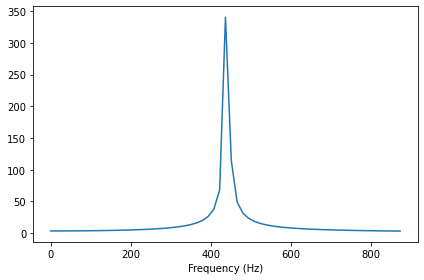

In [2]:
from thinkdsp import SinSignal

signal = SinSignal(freq=440)
duration = signal.period * 30.25
wave = signal.make_wave(duration)
spectrum = wave.make_spectrum()

spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')

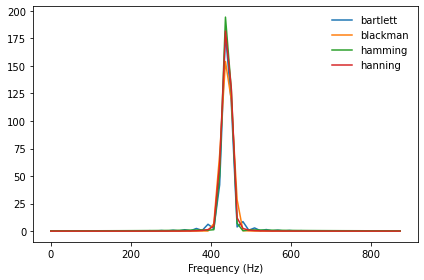

In [3]:
import numpy as np
for window_func in [np.bartlett, np.blackman, np.hamming, np.hanning]:
    wave = signal.make_wave(duration)
    wave.ys *= window_func(len(wave.ys))

    spectrum = wave.make_spectrum()
    spectrum.plot(high=880, label=window_func.__name__)

decorate(xlabel='Frequency (Hz)')

In [4]:
# ---------- УПРАЖНЕНИЕ 2 ----------

In [5]:
from thinkdsp import Chirp
from thinkdsp import normalize, unbias

PI2 = 2 * np.pi

class SawtoothChirp(Chirp):

    def evaluate(self, ts):
        freqs = np.linspace(self.start, self.end, len(ts))
        dts = np.diff(ts, prepend=0)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        cycles = phases / PI2
        frac, _ = np.modf(cycles)
        ys =  normalize(unbias(frac), self.amp)
        return ys

In [6]:
signal = SawtoothChirp(start=10, end=1000)
wave = signal.make_wave(duration=1, framerate=10000)
wave.apodize()
wave.make_audio()

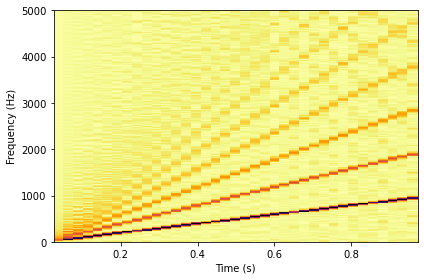

In [7]:
sp = wave.make_spectrogram(512)
sp.plot()
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

In [8]:
from thinkdsp import read_wave

read_wave('res/tos-redalert.wav').make_audio()

In [9]:
# ---------- УПРАЖНЕНИЕ 3 ----------

In [10]:
signal = SawtoothChirp(start=2500, end=3000)
wave = signal.make_wave(duration=1, framerate=20000)
wave.make_audio()

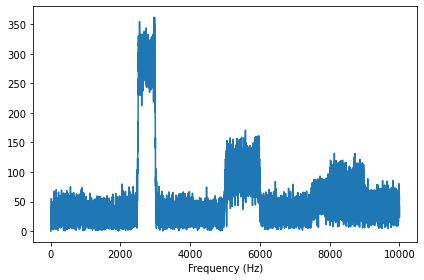

In [11]:
wave.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

In [12]:
# ---------- УПРАЖНЕНИЕ 4 ----------

In [13]:
wave = read_wave('res/vitas.wav')
wave.make_audio()

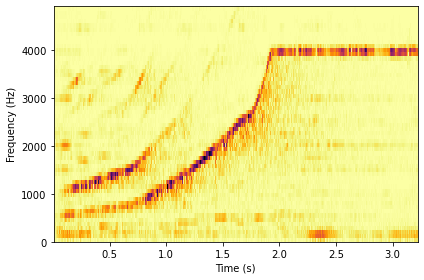

In [14]:
wave.make_spectrogram(512).plot(high=5000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

In [15]:
# ---------- УПРАЖНЕНИЕ 5 ----------

In [16]:
class TromboneGliss(Chirp):

    def evaluate(self, ts):
        l1, l2 = 1.0 / self.start, 1.0 / self.end
        lengths = np.linspace(l1, l2, len(ts))
        freqs = 1 / lengths
        
        dts = np.diff(ts, prepend=0)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        ys = self.amp * np.cos(phases)
        return ys

In [17]:
low = 262
high = 349
signal = TromboneGliss(high, low)
wave1 = signal.make_wave(duration=1)
wave1.apodize()
wave1.make_audio()

In [18]:
signal = TromboneGliss(low, high)
wave2 = signal.make_wave(duration=1)
wave2.apodize()
wave2.make_audio()

In [19]:
wave = wave1 | wave2
wave.make_audio()

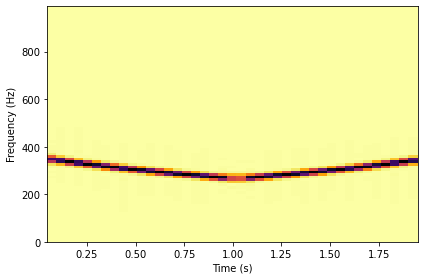

In [20]:
sp = wave.make_spectrogram(1024)
sp.plot(high=1000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

In [21]:
# ---------- УПРАЖНЕНИЕ 6 ----------

wave = read_wave('res/vowels.wav')
wave.make_audio()

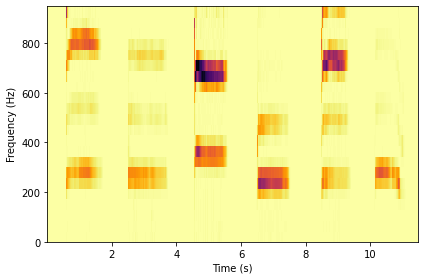

In [22]:
wave.make_spectrogram(1024).plot(high=1000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

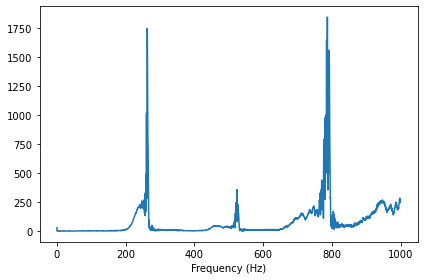

In [23]:
high = 1000

segment = wave.segment(start=0, duration=2)
segment.make_spectrum().plot(high=high)
decorate(xlabel='Frequency (Hz)')

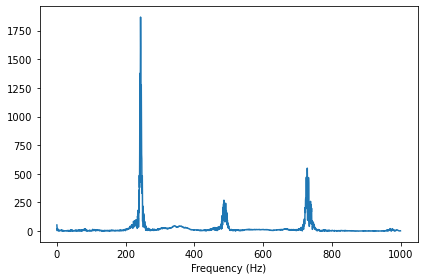

In [24]:
segment = wave.segment(start=2, duration=2)
segment.make_spectrum().plot(high=high)
decorate(xlabel='Frequency (Hz)')

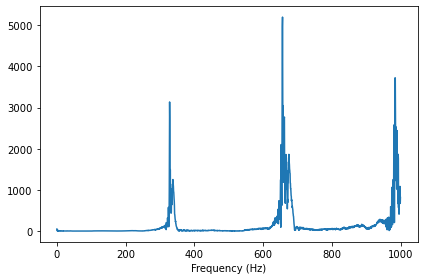

In [25]:
segment = wave.segment(start=4, duration=2)
segment.make_spectrum().plot(high=high)
decorate(xlabel='Frequency (Hz)')

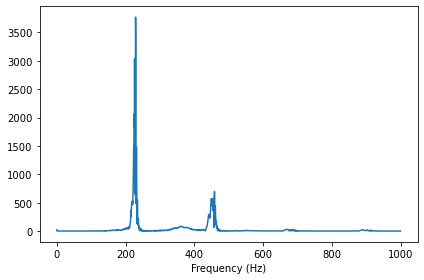

In [26]:
segment = wave.segment(start=6, duration=2)
segment.make_spectrum().plot(high=high)
decorate(xlabel='Frequency (Hz)')

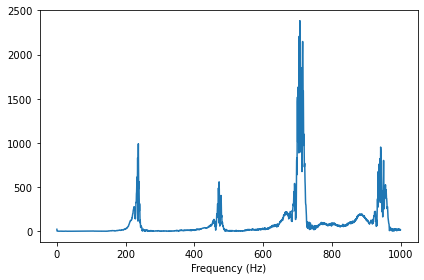

In [27]:
segment = wave.segment(start=8, duration=2)
segment.make_spectrum().plot(high=high)
decorate(xlabel='Frequency (Hz)')

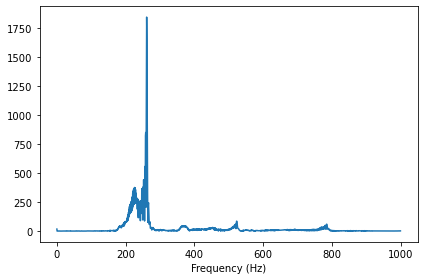

In [28]:
segment = wave.segment(start=10, duration=2)
segment.make_spectrum().plot(high=high)
decorate(xlabel='Frequency (Hz)')